In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TASK 1
#question 2
# load dataset
data = pd.read_csv('index_1.csv')

#question 3
# display first few rows
print(" First 4 rows of the dataset:\n", data.head())

#question 4
# check structure of dataset
print("\n Dataset info:\n", data.info())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Basic statistics
print("\nSummary statistics:\n", data.describe())

#question 5
# Fill missing values in 'Academic Level' with the mode
mode_value = data['card'].mode()[0]
data['card'].fillna(mode_value, inplace=True)

# Confirm missing values are handled
print("\nMissing values after cleaning:")
print(data.isnull().sum())


 First 4 rows of the dataset:
          date                 datetime cash_type                 card  money  \
0  2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   38.7   
1  2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   38.7   
2  2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   38.7   
3  2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   28.9   
4  2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   38.7   

     coffee_name  
0          Latte  
1  Hot Chocolate  
2  Hot Chocolate  
3      Americano  
4          Latte  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3636 non-null   object 
 1   datetime     3636 non-null   object 
 2   cash_type    3636 non-null   object 
 3   card         3547 non-null   object 
 4   money      

In [47]:
# TASK 2
# question 1
# Basic statistics for numerical columns
print("\nBasic Statistics:")
print(data.describe())

# Median and standard deviation separately
print("\nMedian values:")
print(data.median(numeric_only=True))

print("\nStandard deviation:")
print(data.std(numeric_only=True))

#question 2
# Display column names to help identify categorical and numerical columns
print("Columns in dataset:")
print(data.columns)

# Identify categorical and numerical columns
categorical_cols = data.select_dtypes(include='object').columns
numerical_cols = data.select_dtypes(include='number').columns

print("\nCategorical columns:", list(categorical_cols))
print("Numerical columns:", list(numerical_cols))

# Example: Use the first categorical and numerical columns found
if len(categorical_cols) > 0 and len(numerical_cols) > 0:
    cat_col = categorical_cols[0]
    num_col = numerical_cols[0]
    print(f"\nGrouping by '{cat_col}' and calculating mean of '{num_col}':\n")
    group_means = data.groupby(cat_col)[num_col].mean()
    print(group_means)
else:
    print("No suitable categorical or numerical columns found for grouping.")



Basic Statistics:
             money
count  3636.000000
mean     31.746859
std       4.919926
min      18.120000
25%      27.920000
50%      32.820000
75%      35.760000
max      40.000000

Median values:
money    32.82
dtype: float64

Standard deviation:
money    4.919926
dtype: float64
Columns in dataset:
Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

Categorical columns: ['date', 'datetime', 'cash_type', 'card', 'coffee_name']
Numerical columns: ['money']

Grouping by 'date' and calculating mean of 'money':

date
2024-03-01    36.027273
2024-03-02    32.585714
2024-03-03    34.910000
2024-03-04    33.800000
2024-03-05    37.611111
                ...    
2025-03-19    29.693333
2025-03-20    29.880000
2025-03-21    31.840000
2025-03-22    30.451667
2025-03-23    34.126667
Name: money, Length: 381, dtype: float64


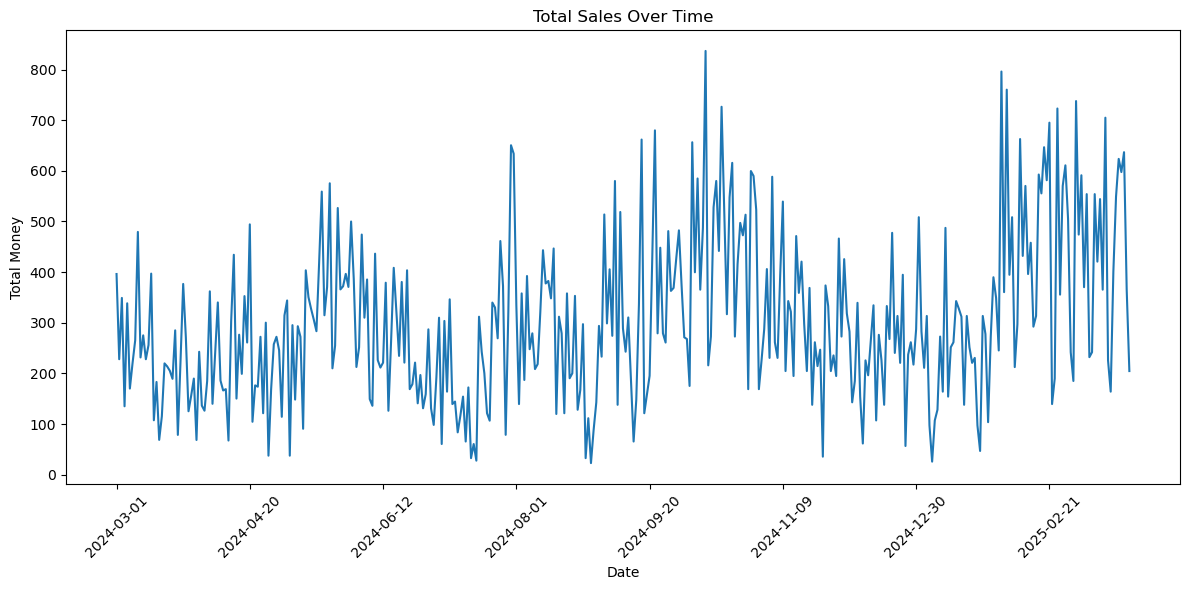

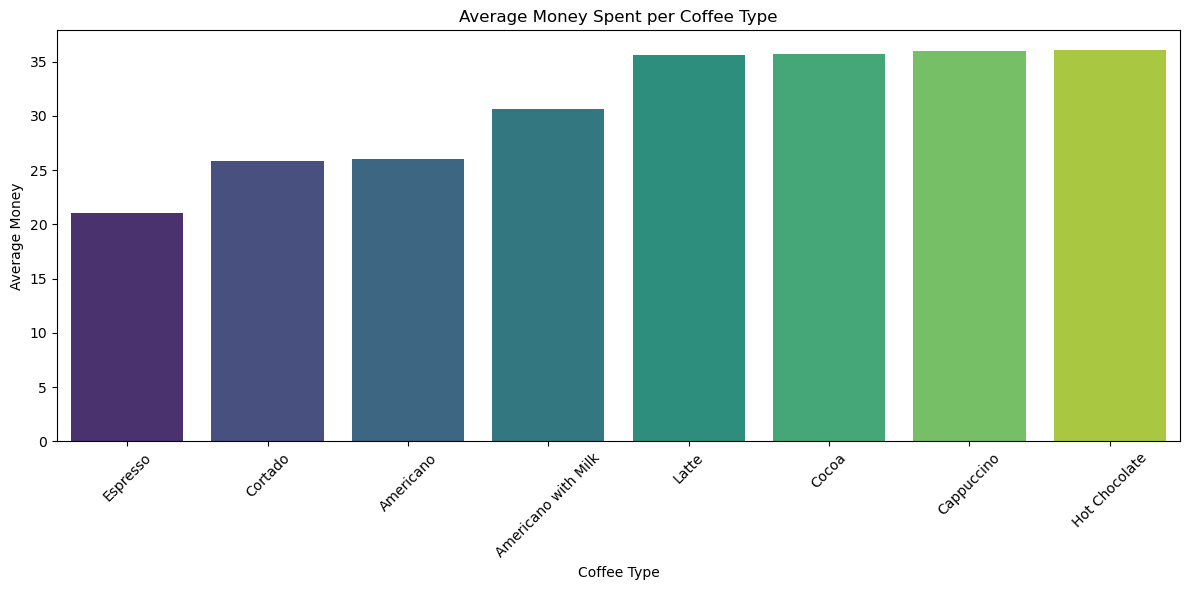

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


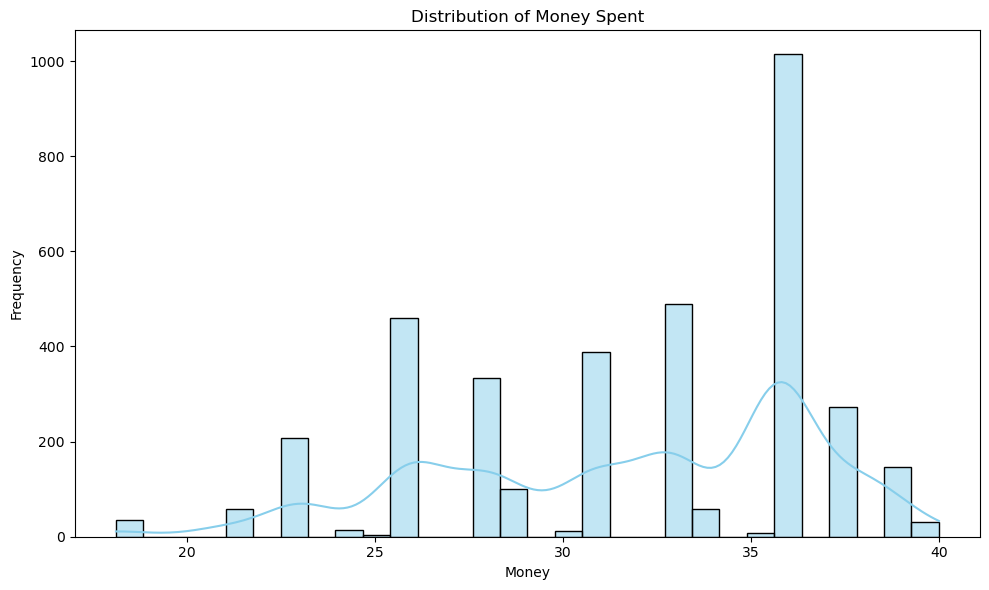

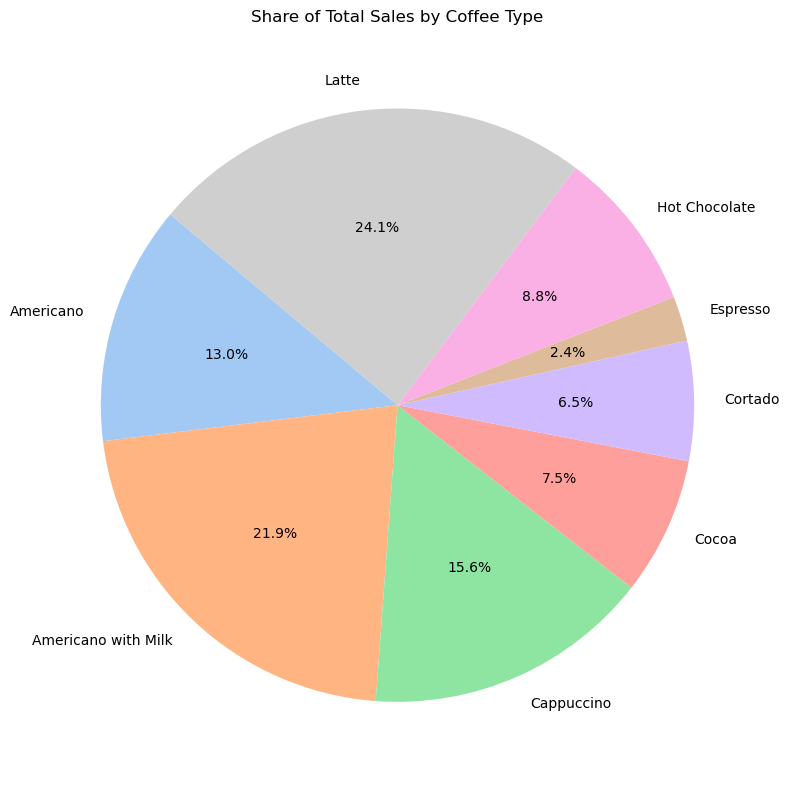

In [45]:
# TASK 3
# 1. LINE GRAPH
# Group by date and sum money
sales_by_date = data.groupby('date')['money'].sum()

plt.figure(figsize=(12, 6))
sales_by_date.plot(kind='line')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Money')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#2. BAR CHART
# Group by coffee type and compute average money
avg_money_per_coffee = data.groupby('coffee_name')['money'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_money_per_coffee.index, y=avg_money_per_coffee.values, palette="viridis")
plt.title('Average Money Spent per Coffee Type')
plt.xlabel('Coffee Type')
plt.ylabel('Average Money')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. HISTOGRAM
plt.figure(figsize=(10, 6))
sns.histplot(data['money'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Money Spent')
plt.xlabel('Money')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# PIE CHART
# Sum total money per coffee type
sales_by_coffee = data.groupby('coffee_name')['money'].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    sales_by_coffee,
    labels=sales_by_coffee.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel'),
)
plt.title('Share of Total Sales by Coffee Type')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

